In [1]:
# Test rotated face annotation

In [2]:
import dlib, cv2, os
import pandas as pd
import numpy as np

In [3]:
dirname = 'CAT_00'
base_path = '/data/etc/molo/%s' % dirname

In [4]:
file_list =  sorted(os.listdir(base_path))

In [5]:
dataset = {
    'imgs': [],
    'lmks' : [],
    'bbs' : []
}

In [6]:
pd_frame = pd.read_csv(os.path.join(base_path, '00000032_002.jpg.cat'), sep =' ', header=None)

In [7]:
landmarks = (pd_frame.to_numpy()[0][1:-1]).reshape((-1, 2))

In [9]:
landmarks

array([[411., 168.],
       [400., 198.],
       [381., 178.],
       [435., 151.],
       [470., 165.],
       [437., 177.],
       [426., 207.],
       [444., 235.],
       [409., 219.]])

In [11]:
x_min = 10000
y_min = 10000
x_idx = 0 
y_idx = 0
for i in landmarks:
    if i[0] < x_min :
        x_min = i[0]
        x_idx = i
    if i[1] < y_min :
        y_min = i[1] 
        y_idx = i

print(x_min, x_idx)
print(y_min, y_idx)

381.0 [381. 178.]
151.0 [435. 151.]


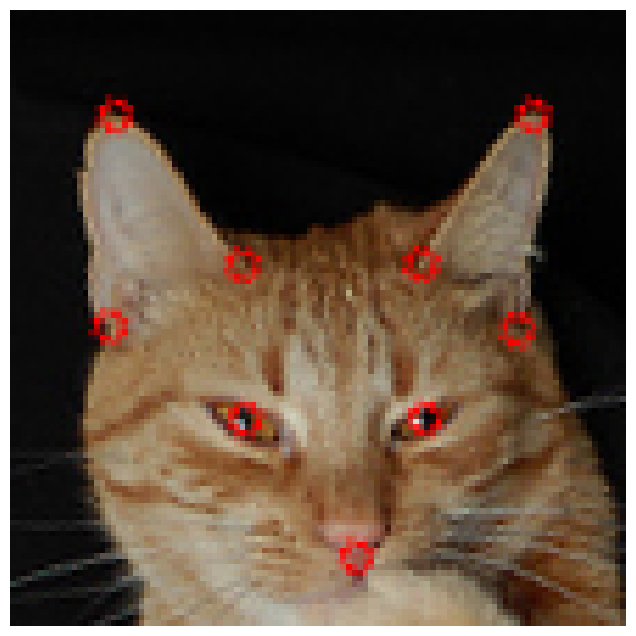

In [25]:
import cv2
import matplotlib.pyplot as plt

test_image = cv2.imread(os.path.join(base_path, '00000032_002.jpg'))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

pd_frame = pd.read_csv(os.path.join(base_path, '00000032_002.jpg.cat'), sep =' ', header=None)
landmarks = (pd_frame.to_numpy()[0][1:-1]).reshape((-1, 2))

for lmk in landmarks:
    x, y = int(lmk[0]), int(lmk[1])
    cv2.circle(test_image, (x, y), radius=3, color=(255, 0, 0), thickness=1)

# Calculate the angle of rotation
left_ear = landmarks[4]
right_ear = landmarks[7]
angle = np.degrees(np.arctan2(right_ear[1] - left_ear[1], right_ear[0] - left_ear[0]))

# Calculate the center for rotation
rotation_center_x,rotation_center_y = landmarks[6]

rotation_matrix = cv2.getRotationMatrix2D((rotation_center_x, rotation_center_y), angle, 1)

# Perform rotation
rotated_image = cv2.warpAffine(test_image, rotation_matrix, (test_image.shape[1], test_image.shape[0]))

# Update landmarks after rotation
landmarks_homogenous = np.hstack([landmarks, np.ones((landmarks.shape[0], 1))])  # For affine transformation
rotated_landmarks = rotation_matrix.dot(landmarks_homogenous.T).T

# Recalculate the bounding box on the rotated image
new_left_ear = rotated_landmarks[4]
new_right_ear = rotated_landmarks[7]
width = int(new_right_ear[0] - new_left_ear[0])
margin = int(width * 0.25)
height = width
x = int(new_left_ear[0]) - margin
y = int(new_left_ear[1]) - margin

# Ensure cropping is within the image boundaries
x = max(0, x)
y = max(0, y)
x_end = min(rotated_image.shape[1], x + width + 2 * margin)
y_end = min(rotated_image.shape[0], y + height + 2 * margin)
cropped_image = rotated_image[y:y_end, x:x_end]

# Visualization
plt.figure(figsize=(8, 8))
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

[[ 55.07366798 212.73967579]
 [115.48390559 211.96302098]
 [ 92.99468354 261.43255596]
 [  3.00402775 197.88193149]
 [ -1.14938714 114.30711983]
 [ 48.15130985 162.29088039]
 [ 96.         163.        ]
 [146.92154181 114.30711983]
 [133.24566354 195.21429104]]
[ -1.14938714 114.30711983]
-38


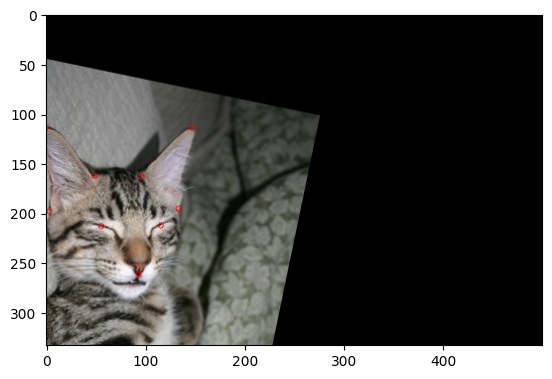

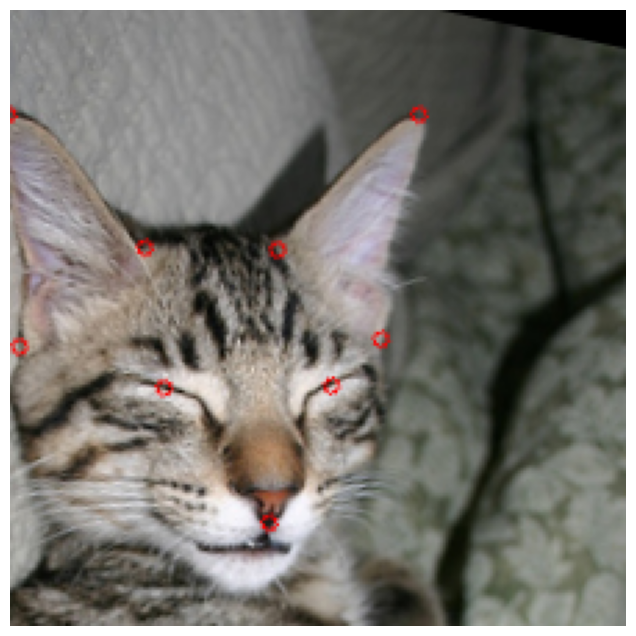

In [26]:
import cv2
import matplotlib.pyplot as plt

test_image = cv2.imread(os.path.join(base_path, '00000318_015.jpg'))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

pd_frame = pd.read_csv(os.path.join(base_path, '00000318_015.jpg.cat'), sep =' ', header=None)
landmarks = (pd_frame.to_numpy()[0][1:-1]).reshape((-1, 2))

for lmk in landmarks:
    x, y = int(lmk[0]), int(lmk[1])
    cv2.circle(test_image, (x, y), radius=3, color=(255, 0, 0), thickness=1)

# Calculate the angle of rotation
left_ear = landmarks[4]
right_ear = landmarks[7]
angle = np.degrees(np.arctan2(right_ear[1] - left_ear[1], right_ear[0] - left_ear[0]))

# Calculate the center for rotation
rotation_center_x,rotation_center_y = landmarks[6]
rotation_matrix = cv2.getRotationMatrix2D((rotation_center_x, rotation_center_y), angle, 1)

# Perform rotation
rotated_image = cv2.warpAffine(test_image, rotation_matrix, (test_image.shape[1], test_image.shape[0]))
plt.imshow(rotated_image)
# Update landmarks after rotation
landmarks_homogenous = np.hstack([landmarks, np.ones((landmarks.shape[0], 1))])  # For affine transformation
rotated_landmarks = rotation_matrix.dot(landmarks_homogenous.T).T
print(rotated_landmarks)

# Recalculate the bounding box on the rotated image
new_left_ear = rotated_landmarks[4]
print(new_left_ear)
new_right_ear = rotated_landmarks[7]
width = int(new_right_ear[0] - new_left_ear[0])
margin = int(width * 0.25)
height = width
x = int(new_left_ear[0]) - margin
print(x)
y = int(new_left_ear[1]) - margin

# Ensure cropping is within the image boundaries
x = max(0, x)
y = max(0, y)
x_end = min(rotated_image.shape[1], x + width + 2 * margin)
y_end = min(rotated_image.shape[0], y + height + 2 * margin)
cropped_image = rotated_image[y:y_end, x:x_end]

# Visualization
plt.figure(figsize=(8, 8))
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

In [20]:
x

0

[[224.89125348 509.90392201]
 [309.64424979 524.8012243 ]
 [252.14449098 579.05781594]
 [176.47767939 473.06473304]
 [174.1542957  402.03937216]
 [235.4661051  460.01231437]
 [311.         475.        ]
 [362.24204118 402.03937216]
 [361.22124103 508.13347174]]
[174.1542957  402.03937216]
127


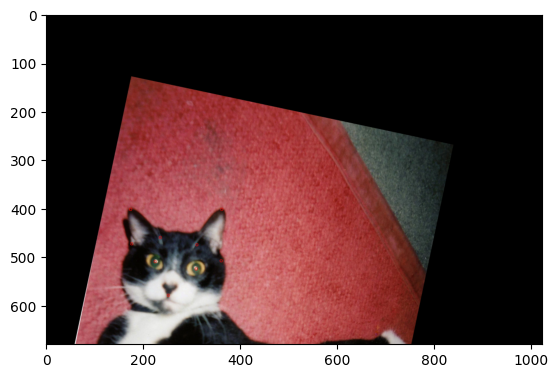

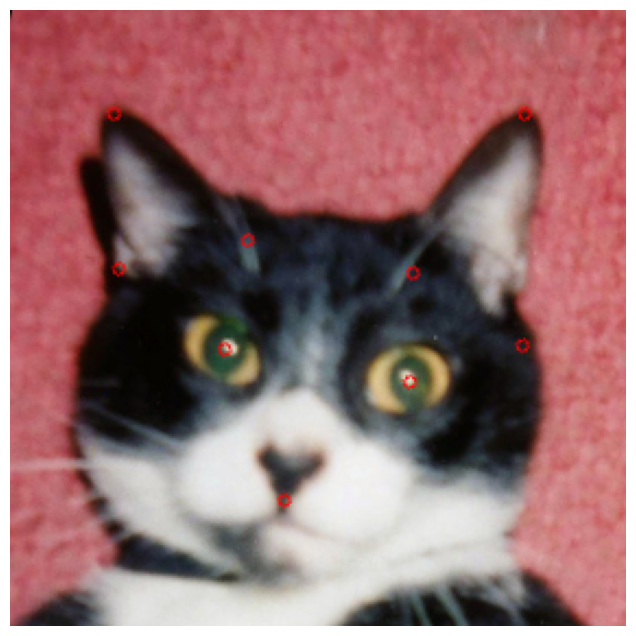

In [27]:
import cv2
import matplotlib.pyplot as plt

test_image = cv2.imread(os.path.join(base_path, '00000385_002.jpg'))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

pd_frame = pd.read_csv(os.path.join(base_path, '00000385_002.jpg.cat'), sep =' ', header=None)
landmarks = (pd_frame.to_numpy()[0][1:-1]).reshape((-1, 2))

for lmk in landmarks:
    x, y = int(lmk[0]), int(lmk[1])
    cv2.circle(test_image, (x, y), radius=3, color=(255, 0, 0), thickness=1)

# Calculate the angle of rotation
left_ear = landmarks[4]
right_ear = landmarks[7]
angle = np.degrees(np.arctan2(right_ear[1] - left_ear[1], right_ear[0] - left_ear[0]))

# Calculate the center for rotation
rotation_center_x,rotation_center_y = landmarks[6]
rotation_matrix = cv2.getRotationMatrix2D((rotation_center_x, rotation_center_y), angle, 1)

# Perform rotation
rotated_image = cv2.warpAffine(test_image, rotation_matrix, (test_image.shape[1], test_image.shape[0]))
# Update landmarks after rotation
landmarks_homogenous = np.hstack([landmarks, np.ones((landmarks.shape[0], 1))])  # For affine transformation
rotated_landmarks = rotation_matrix.dot(landmarks_homogenous.T).T

# Recalculate the bounding box on the rotated image
new_left_ear = rotated_landmarks[4]

new_right_ear = rotated_landmarks[7]
width = int(new_right_ear[0] - new_left_ear[0])
margin = int(width * 0.25)
height = width
x = int(new_left_ear[0]) - margin
print(x)
y = int(new_left_ear[1]) - margin

# Ensure cropping is within the image boundaries
x = max(0, x)
y = max(0, y)
x_end = min(rotated_image.shape[1], x + width + 2 * margin)
y_end = min(rotated_image.shape[0], y + height + 2 * margin)
cropped_image = rotated_image[y:y_end, x:x_end]

# Visualization
plt.figure(figsize=(8, 8))
plt.imshow(cropped_image)
plt.axis('off')
plt.show()